
```
* High Dimension Annalysis
* Programming Exercise 1
* Name: Tieu Khoi Mai
* Student Code: 1711159
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Xulydachieu/Lab01")
print(os.getcwd())

/content/drive/My Drive/Xulydachieu/Lab01


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read dataset

In [ ]:
df = pd.read_csv("room-temperature.csv")
df = df.set_index('Date')
df.head()

,FrontLeft,FrontRight,BackLeft,BackRight
Date,,,,
4/11/2010 11:30,295.2,297.0,295.8,296.3
4/11/2010 12:00,296.2,296.4,296.2,296.3
4/11/2010 12:30,297.3,297.5,296.7,297.1
4/11/2010 13:00,295.9,296.7,297.4,297.0
4/11/2010 13:30,297.2,296.5,297.6,297.4


#a. Plot a time series plot for each type of temperature data: FrontLeft, FrontRight, BackLeft and BackRight.

In [ ]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

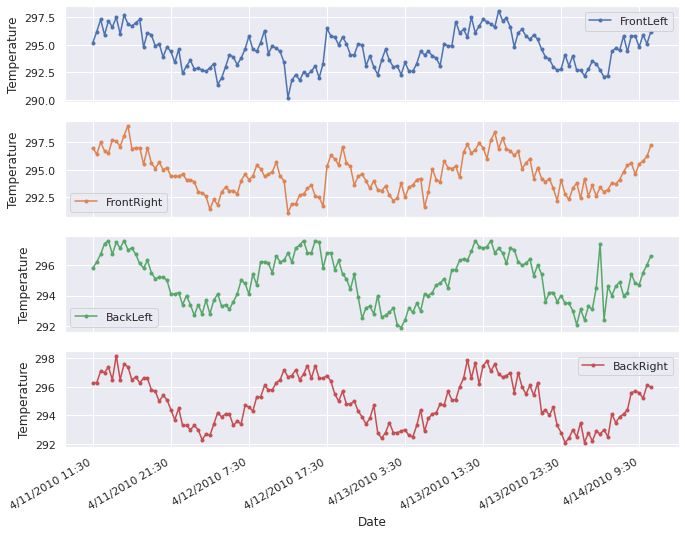

In [ ]:
cols_plot = ['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']
axes = df[cols_plot].plot(marker='.', linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
  ax.set_ylabel('Temperature')

# b. Implement the PCA algorithm to the whole data set.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(df)

In [ ]:
scaled_data

array([[ 0.42247739,  1.38754581,  0.46612692,  0.80577074],
       [ 1.03267542,  1.03649469,  0.71894153,  0.80577074],
       [ 1.70389326,  1.68008841,  1.03495978,  1.29303997],
       [ 0.84961601,  1.21202025,  1.47738534,  1.23213132],
       [ 1.64287345,  1.09500321,  1.60379264,  1.47576593],
       [ 1.27675463,  1.79710545,  1.03495978,  0.92758805],
       [ 1.82593286,  1.73859693,  1.54058899,  1.96303517],
       [ 0.91063581,  1.44605433,  1.28777438,  0.92758805],
       [ 1.94797247,  2.03113953,  1.60379264,  1.59758324],
       [ 1.45981404,  2.55771622,  1.22457073,  1.47576593],
       [ 1.33777444,  1.32903729,  1.28777438,  0.92758805],
       [ 1.52083385,  1.38754581,  1.03495978,  1.04940535],
       [ 1.70389326,  1.38754581,  0.65573788,  0.80577074],
       [ 0.17839817,  0.50991801,  0.46612692,  0.9884967 ],
       [ 0.97165562,  1.38754581,  0.78214518,  0.9884967 ],
       [ 0.84961601,  0.56842653,  0.27651597,  0.50122747],
       [ 0.23941798,  0.

In [ ]:
mean_vec = np.mean(scaled_data, axis = 0)
dotP = (scaled_data - mean_vec).T.dot(scaled_data-mean_vec)
n = scaled_data.shape[0]
cov_mat = dotP/ (n-1)
print("Covariance matrix: \n", cov_mat)

Covariance matrix: 
 [[1.00699301 0.85843736 0.56224176 0.60990539]
 [0.85843736 1.00699301 0.59178547 0.64356475]
 [0.56224176 0.59178547 1.00699301 0.89020112]
 [0.60990539 0.64356475 0.89020112 1.00699301]]


In [ ]:
from numpy.linalg import eig
# calculate the mean of each rows
M = np.mean(scaled_data)
# center columns by subtracting column means
C = scaled_data - M
# calculate covariance matrix of centered matrix
cov_mat1 = C.T.dot(C) / (scaled_data.shape[0]-1)
print("Covariance matrix: \n", cov_mat1)

Covariance matrix: 
 [[1.00699301 0.85843736 0.56224176 0.60990539]
 [0.85843736 1.00699301 0.59178547 0.64356475]
 [0.56224176 0.59178547 1.00699301 0.89020112]
 [0.60990539 0.64356475 0.89020112 1.00699301]]


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [ ]:
print("Eigenvalues \n%s" %eig_vals) # Trị riêng 

Eigenvalues 
[3.08574919 0.68059492 0.14777058 0.11385733]


In [ ]:
print("Eigenvectors \n%s" %eig_vecs) # Vectơ riêng

Eigenvectors 
[[-0.49127375 -0.5308801  -0.68995833  0.02781941]
 [-0.50211307 -0.47235221  0.71672467 -0.10522166]
 [-0.49486494  0.53968805 -0.09011509 -0.67507391]
 [-0.51150881  0.4514272   0.04628735  0.72967781]]


In [ ]:
explain_variance = np.array([eig_vals[0]/sum(eig_vals),
          eig_vals[1]/sum(eig_vals),
          eig_vals[2]/sum(eig_vals),
          eig_vals[3]/sum(eig_vals)])
                        
explain_variance

array([0.7660801 , 0.16896714, 0.0366861 , 0.02826666])

In [ ]:
var = np.cumsum(np.round(explain_variance,decimals=3)*100)
var

array([ 76.6,  93.5,  97.2, 100. ])

In [ ]:
cumulative = pd.DataFrame({'Eigenvalue': eig_vals,
                           'Proportion of Variance': explain_variance,
                           'Cumulative proportion': var ,
                         })
cumulative

,Eigenvalue,Proportion of Variance,Cumulative proportion
0,3.085749,0.766080,76.6
1,0.680595,0.168967,93.5
2,0.147771,0.036686,97.2
3,0.113857,0.028267,100.0


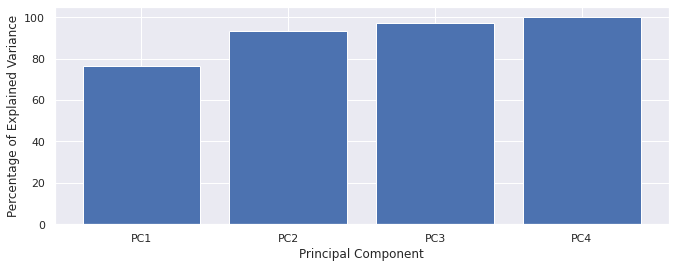

In [ ]:
labels = ['PC' + str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1),height = var,tick_label = labels)
plt.xlabel("Principal Component")
plt.ylabel("Percentage of Explained Variance")
plt.show()

#c. How many latent variables should we use for the PCA algorithm to keep the most meaningful information? Apply the PCA for the temperature data by your chosen number of latent variables.

## Dựa trên bảng và hình phía trên, ta thấy số phần trăm tích luỹ biểu hiển giữa số biến 2,3,4 không có sự chênh lệch nhiều. Vì vậy ta chọn số biến là 2



In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
pca = PCA()
pca.fit(X)
x_new = pca.transform(X)   

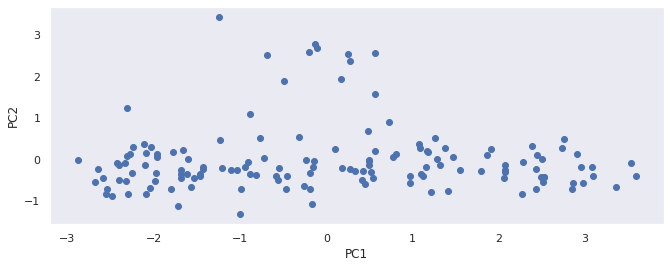

In [ ]:
pca = PCA()
pca.fit(scaled_data)
x_new = pca.transform(scaled_data)  

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def plotPCA(score,coeff):
    x = score[:,0]
    y = score[:,1]
    n = coeff.shape[0]

    plt.scatter(x ,y)

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

plotPCA(x_new[:,0:2], pca.components_) 
plt.show()